# Download US power output PV Watts (version 8) 

## Documentation: https://developer.nrel.gov/docs/api-key/
## https://pvwatts.nrel.gov/downloads/pvwattsv5.pdf

In [1]:
import numpy as np
import scipy as sp
import requests
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
hrh_apikey1 = 'GNoTfD5IZWwIEz24zB5Wn0aEhDvNJSep5bwapzTI'
hrh_apikey2 = 'bupvdoNsjaox9hQeCD6yufHWNf4cnM5OTNLlEBlZ'
hrh_apikey3 = 'wfaZg9uNJwCc9zJfiCXTEDnmloDEk0o6EATrdC6A'
hrh_apikey4 = '7iehBlUn3NW7rEEQYvMvB2xsinpbFQAnYGnrFoiy'
hrh_apikey5 =  'HGHXaFdKeMcknyEsmXnFMnL4aqgZK5HuZ5AV0tyG'
hrh_apikey6 = 'vPgwOy4OgMoOpnYtBsK5PyfEMwqD78HXCK5u1sNx'
data_path   = '/Users/hrh/Desktop/AI/erdos/rapower_data/'

In [3]:
# 1. Define PVWatts parameters and your API key
parameters = {
    'format': 'json',
    'system_capacity': 1000,
    'module_type': 0,
    'losses': 14.08,
    'array_type': 1,
    'tilt': 40,
    'azimuth': 180,
    'lat': 40.0099983215332,
    'lon':  -105.2600021362305,
    'dataset': 'nsrdb',
    'radius': 25,
    'timeframe': 'monthly',
    'api_key': hrh_apikey1  # Replace with your API key
}



In [4]:
url = 'https://developer.nrel.gov/api/pvwatts/v8'

# 2. Send request
response = requests.get(url, params=parameters)
data = response.json()

# 3. Convert the output data to a DataFrame
df = pd.DataFrame(data['outputs'])

print(response)

<Response [200]>


In [5]:
##### Try to get data for California on a grid with lat_delta and lon_delta resolution
# lat_delta = 0.25
# lon_delta = 0.25

# # #CONUS box
# # top = 49.3457868 # north lat
# # left = -124.7844079 # west long
# # right = -66.9513812 # east long
# # bottom =  24.7433195 # south lat

# #California box
# top    = 42.009518
# bottom = 32.534156
# left   = -124.409591 
# right  =  -114.131211


## Define list of lat lon coordinates (either for CONUS or California)

<font color ='red'> PVWatts API access currently has a limit of 1000 queries per hour. So, data has to be downloaded one chunk (size<1000) at a time </font>

In [6]:
# 1. Define a list of latitudes and longitudes for CONUS
all_data = []
##### Read lats and lons CA_grid_dataframe #############
data_path2     = '/Users/hrh/Desktop/AI/erdos/SolarFarmPrediction/data/'
ca_gridpath    = data_path2 + 'CA_data_version_11.csv'

df_main             = pd.read_csv(ca_gridpath)
ca_grid0            = df_main.loc[df_main['State']=='CA']
ca_grid0

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
0,40.417985,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,40.457093,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,40.398431,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,40.417985,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,40.437539,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91361,34.277993,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,201.0
91362,34.297547,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,31.0,228.0
91363,34.317101,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,148.0
91364,34.258439,-114.138592,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,112.0


In [7]:
### Remove rows where there is no data for land_cover,slope or elevation
ca_grid = ca_grid0.dropna(subset = ['slope','elevation','land_cover'])
ca_grid

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
0,40.417985,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,40.457093,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,40.398431,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,40.417985,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,40.437539,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91361,34.277993,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,201.0
91362,34.297547,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,31.0,228.0
91363,34.317101,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,148.0
91364,34.258439,-114.138592,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,112.0


In [8]:
#Check if it worked
ca_grid['slope'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
91361    False
91362    False
91363    False
91364    False
91365    False
Name: slope, Length: 91330, dtype: bool

In [9]:
#ca_grid_usable      = ca_grid.loc[ca_grid['land_cover']==1.0]
ca_coords           = list(zip(ca_grid['Latitude'], ca_grid['Longitude']))
#Check if ca_coords are within california grid box
ca_lats = [item[0] for item in ca_coords] 
ca_lons = [item[1] for item in ca_coords]
(min(ca_lats),max(ca_lats)),(min(ca_lons),max(ca_lons))
ca_grid

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
0,40.417985,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,40.457093,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,40.398431,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,40.417985,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,40.437539,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91361,34.277993,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,201.0
91362,34.297547,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,31.0,228.0
91363,34.317101,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,148.0
91364,34.258439,-114.138592,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,112.0


### Reduce the grid points to those with solar farms and a a few sites with no solar farms

In [10]:
solar_farms = ca_grid.loc[ca_grid['Solar_farm_present']==1]
solar_farms

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
16282,40.633080,-122.314591,1.0,CA,0.026765,1.910786,702.0,0.026765,0.0,0.0,"JMJJ+R4 Columbia, Redding, CA, USA",1.0,1.0,185.0
16530,40.496202,-122.293018,1.0,CA,0.014312,1.127613,3.0,0.014312,0.0,0.0,"6759 Airport Rd, Redding, CA 96002, USA",1.0,0.0,149.0
16672,38.267033,-122.271446,1.0,CA,0.034076,NaN,3.0,0.034076,0.0,1.0,"7PCC+W7 Napa, CA, USA",1.0,1.0,9.0
18742,38.227924,-122.098865,1.0,CA,0.032722,2.263317,4.0,0.032722,0.0,0.0,"6WJ4+QW Fairfield, CA, USA",1.0,0.0,10.0
21251,37.719517,-121.904712,1.0,CA,0.028839,NaN,5.0,0.030839,0.0,1.0,"P3GR+8Q Dublin, CA, USA",1.0,2.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85756,35.588119,-115.432945,1.0,CA,5.889066,179.797992,6.0,5.889066,0.0,0.0,"HHP8+27 Calada, CA, USA",1.0,1.0,816.0
85969,33.828249,-115.389800,1.0,CA,14.031455,373.646009,6.0,14.031455,0.0,0.0,"RJ96+C8 Desert Center, CA, USA",1.0,0.0,216.0
89035,33.574045,-114.915204,1.0,CA,0.308603,NaN,3.0,0.308603,0.0,1.0,"H38J+CM Blythe, CA, USA",1.0,1.0,131.0
89164,33.574045,-114.893631,1.0,CA,0.033762,NaN,3.0,0.033762,0.0,1.0,"H38W+3C Blythe, CA, USA",1.0,0.0,133.0


### Let us pick locations where only one feature is restricting:

#### 1) Slope 2) Elevation 3) Land Cover

### The thresholds will be set at 90% percentile of the feature set of existing solar farm locations

In [13]:
slope_threshold       = solar_farms['slope'].quantile(0.95)
elevation_threshold   = solar_farms['elevation'].quantile(0.95)
print(slope_threshold,elevation_threshold)  

7.0 911.8


In [12]:
np.sort(solar_farms['slope'])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  3.,  3.,  3

In [13]:
high_slope = ca_grid.loc[(ca_grid['Solar_farm_present']!=1) & (ca_grid['slope']>=slope_threshold) &(ca_grid['land_cover']!=0)]
high_slope

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
33,40.437539,-124.407129,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.0,76.0
57,40.417985,-124.385556,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.0,270.0
58,40.437539,-124.385556,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.0,218.0
59,40.457093,-124.385556,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.0,193.0
60,40.476647,-124.385556,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,8.0,69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91359,34.317101,-114.181737,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,33.0,370.0
91361,34.277993,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,201.0
91362,34.297547,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,31.0,228.0
91363,34.317101,-114.160164,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,20.0,148.0


In [14]:
high_elevation = ca_grid.loc[(ca_grid['Solar_farm_present']!=1) & (ca_grid['elevation']>=elevation_threshold) & (ca_grid['slope']<slope_threshold) & (ca_grid['land_cover']!=0)]
high_elevation 

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
1999,41.923652,-123.889387,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1011.0
2970,40.593972,-123.738380,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1140.0
4950,40.241998,-123.479509,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1512.0
4984,40.906838,-123.479509,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1248.0
5127,40.320215,-123.457936,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88584,35.040604,-115.001494,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,954.0
88585,35.060158,-115.001494,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,976.0
88717,35.040604,-114.979921,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,897.0
88718,35.060158,-114.979921,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,883.0


In [15]:
land_cover = ca_grid.loc[(ca_grid['Solar_farm_present']!=1) & (ca_grid['elevation'] < elevation_threshold) & (ca_grid['slope']<slope_threshold) & (ca_grid['land_cover']==0)]
land_cover

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
0,40.417985,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
1,40.457093,-124.471847,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,40.398431,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
3,40.417985,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,40.437539,-124.450274,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91241,34.551751,-114.397462,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,137.0
91290,34.434426,-114.332745,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,137.0
91354,34.356210,-114.203309,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,138.0
91360,34.336656,-114.181737,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,138.0


### Let us pick locations with low elevation, low slope and no land cover restrictions 

In [16]:
## I am calling these points rad_limited because they are not infeasible due to any other feature considered so far.
rad_limited = ca_grid.loc[(ca_grid['Solar_farm_present']!=1) & (ca_grid['elevation'] < elevation_threshold) & (ca_grid['slope']<slope_threshold) & (ca_grid['land_cover']!=0)]
rad_limited

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation
87,40.437539,-124.363984,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,379.0
148,40.300660,-124.320839,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,8.0
163,40.593972,-124.320839,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0
164,40.613526,-124.320839,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0
186,40.320215,-124.299266,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91305,34.180223,-114.289600,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,147.0
91307,34.219331,-114.289600,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,257.0
91329,34.180223,-114.246454,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,112.0
91330,34.199777,-114.246454,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,146.0


In [17]:
## Number of locations to be sampled from rad_limited , 800 for each feature slope,elevation and land_cover ##############
radlim_size = 5000 - (len(solar_farms) + 2400)
radlim_size

2397

### Sample points from the dataframes to have a list of 5000 locations and set the labels

In [18]:
## Add extra column called fearture violated 
sample_high_elevation                       = high_elevation.sample(800,random_state=42)
sample_high_elevation['Solar_farm_present'] = 0
sample_high_elevation['feature_violated']   = 'elevation'
sample_high_elevation  

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated
41574,41.806327,-120.588786,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1575.0,elevation
61026,36.780920,-118.151087,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1155.0,elevation
28800,41.356583,-121.386971,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1343.0,elevation
86177,34.962387,-115.368227,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1016.0,elevation
83698,35.627227,-115.713388,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1021.0,elevation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76716,34.669075,-116.533146,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1256.0,elevation
51858,41.297920,-120.027900,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1377.0,elevation
27555,41.864990,-121.473261,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1228.0,elevation
33696,40.691743,-121.063383,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1702.0,elevation


In [19]:
sample_land_cover                       = land_cover.sample(800, random_state=42)
sample_land_cover['Solar_farm_present'] = 0
sample_land_cover['feature_violated']   = 'land_cover'
sample_land_cover      

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated
83411,33.241625,-115.734961,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-70.0,land_cover
68438,33.652262,-117.352903,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,377.0,land_cover
16898,37.660855,-122.249873,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover
41202,34.532197,-120.588786,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover
83580,33.319842,-115.713388,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-70.0,land_cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51496,33.906465,-120.027900,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover
81365,33.417612,-115.993832,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-70.0,land_cover
14574,41.689003,-122.465599,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,798.0,land_cover
46056,36.683149,-120.329916,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,49.0,land_cover


In [20]:
sample_high_slope                       = high_slope.sample(800, random_state=42)
sample_high_slope['Solar_farm_present'] = 0
sample_high_slope['feature_violated']   = 'slope'
sample_high_slope

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated
75436,33.437166,-116.662581,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,21.0,1549.0,slope
7057,39.635821,-123.220638,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,1010.0,slope
67957,36.468054,-117.417620,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,782.0,slope
46796,35.724998,-120.286770,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,400.0,slope
63283,36.800474,-117.913789,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,38.0,755.0,slope
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78737,35.940093,-116.317420,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,635.0,slope
52317,34.747292,-119.984755,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,31.0,1175.0,slope
51090,41.923652,-120.071045,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,1687.0,slope
68027,33.789140,-117.396048,0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,630.0,slope


In [21]:
sample_rad_limited = rad_limited.sample(radlim_size,random_state=42)

### Combine data frames 

In [22]:
ca_grid_sampled = pd.concat([sample_rad_limited,sample_high_elevation,sample_high_slope,solar_farms,sample_land_cover])
ca_grid_sampled

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated
68042,34.082452,-117.396048,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,354.0,NaN
70697,33.710924,-117.137177,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,446.0,NaN
15740,39.948686,-122.357736,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,139.0,NaN
24863,37.934613,-121.645842,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,10.0,NaN
20092,37.973721,-121.991002,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,54.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51496,33.906465,-120.027900,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover
81365,33.417612,-115.993832,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-70.0,land_cover
14574,41.689003,-122.465599,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,798.0,land_cover
46056,36.683149,-120.329916,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,49.0,land_cover


In [23]:
###### Check #############
ca_grid_sampled.loc[ca_grid_sampled['feature_violated']=='slope']

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated
75436,33.437166,-116.662581,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,21.0,1549.0,slope
7057,39.635821,-123.220638,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,1010.0,slope
67957,36.468054,-117.417620,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,782.0,slope
46796,35.724998,-120.286770,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,400.0,slope
63283,36.800474,-117.913789,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,38.0,755.0,slope
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78737,35.940093,-116.317420,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,635.0,slope
52317,34.747292,-119.984755,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,31.0,1175.0,slope
51090,41.923652,-120.071045,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,1687.0,slope
68027,33.789140,-117.396048,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,630.0,slope


In [24]:
#### Get lat and lons 
ca_coords_sample           = list(zip(ca_grid_sampled['Latitude'], ca_grid_sampled['Longitude']))
len(ca_coords_sample )
########
ca_coords_sample1 = ca_coords_sample[0:1000]
ca_coords_sample2 = ca_coords_sample[1000:2000]
ca_coords_sample3 = ca_coords_sample[2000:3000]
ca_coords_sample4 = ca_coords_sample[3000:4000]
ca_coords_sample5 = ca_coords_sample[4000:]
len(ca_coords_sample3)

1000

In [77]:
%%time
df = pd.DataFrame()
for (lat,lon) in ca_coords_sample5:
        
        parameters = {
            'format': 'json',
            'system_capacity': 1000, #1000kW = 1 MW, 1 MW or greater is considered utility-scale
            'module_type': 0,       # 0- Standard module, 1- Permium, 2-Thin film
            'losses': 14,           # Losses in percentage
            'array_type': 0,        # Open Rack: Also known as ground mount.
            'tilt': 40,
            'azimuth': 180,         # This means that the solar array is facing South in the Northeren Hemisphere
            'lat': lat,
            'lon': lon,
            'dataset': 'nsrdb',      #tmy2 is 1960-1990, tmy3 is 1990-2005
            'radius': 100,            # 0-Pick the station nearest to the given (lat,lon),e.g: 50 -50 miles
            'timeframe': 'monthly',
            'api_key': hrh_apikey6
        }

        url = 'https://developer.nrel.gov/api/pvwatts/v8'
        response = requests.get(url, params=parameters)
        data = response.json()
             
        # Extract and append relevant data to the all_data list
        # Extract relevant data
        #print('Processing (lat,lon):',lat,lon,'\n')
        
        # Check if 'outputs' is in the data
        if 'outputs' not in data:
            print(f"No data available for latitude {lat} and longitude {lon}")
            continue

        output_data = data['outputs']
        input_data  = data['inputs']

        output_data['latitude']  = input_data['lat']
        output_data['longitude'] = input_data['lon']
        all_data.append(output_data)
        
        
# Convert all_data to a DataFrame
df = pd.DataFrame(all_data)

print(df)

                                             ac_monthly  \
0     [126643.6284333316, 123642.4656084192, 146079....   
1     [126868.3514493219, 123183.8261829259, 150337....   
2     [81871.68545656932, 90825.3059124629, 139086.2...   
3     [93225.92555313384, 117872.5185756382, 133564....   
4     [96173.72130512354, 120312.542412835, 141419.0...   
...                                                 ...   
4995  [124430.625264793, 128050.6419688767, 145367.7...   
4996  [134881.0702731289, 134061.3259228609, 160552....   
4997  [93573.38738081408, 97924.47093016192, 131421....   
4998  [87091.30519709826, 105473.3029344761, 150766....   
4999  [80130.83642485294, 83019.93567018978, 112548....   

                                            poa_monthly  \
0     [160.3371500625433, 157.9419747969732, 190.017...   
1     [163.6214888471466, 159.1281172506521, 198.769...   
2     [100.9587614211884, 113.1211746079644, 177.813...   
3     [113.2858897184085, 147.74228808641, 170.25043...

In [79]:
df

,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,solrad_annual,capacity_factor,latitude,longitude
0,"[126643.6284333316, 123642.4656084192, 146079....","[160.3371500625433, 157.9419747969732, 190.017...","[5.172166131049785, 5.640784814177614, 6.12959...","[132621.8932622115, 129576.8218587892, 153178....",1.696741e+06,6.137753,19.369193,34.08245206059089,-117.3960478247602
1,"[126868.3514493219, 123183.8261829259, 150337....","[163.6214888471466, 159.1281172506521, 198.769...","[5.278112543456341, 5.683147044666148, 6.41193...","[132793.0245010775, 128887.8434912795, 157389....",1.690435e+06,6.204925,19.297200,33.71092388667484,-117.13717714045092
2,"[81871.68545656932, 90825.3059124629, 139086.2...","[100.9587614211884, 113.1211746079644, 177.813...","[3.256734239393176, 4.040041950284444, 5.73593...","[86019.00030301968, 95337.82386751169, 145682....",1.566192e+06,5.701319,17.878907,39.94868638558109,-122.35773594068836
3,"[93225.92555313384, 117872.5185756382, 133564....","[113.2858897184085, 147.74228808641, 170.25043...","[3.654383539303501, 5.276510288800359, 5.49194...","[97835.782674236, 123415.2943375236, 139980.07...",1.657431e+06,5.892671,18.920446,37.93461260066779,-121.6458415588378
4,"[96173.72130512354, 120312.542412835, 141419.0...","[116.6067532589445, 150.3203686240996, 179.493...","[3.761508169643369, 5.368584593717842, 5.79011...","[100873.0371669258, 125951.7057612103, 148151....",1.666310e+06,5.897817,19.021800,37.973720829501055,-121.99100247125018
...,...,...,...,...,...,...,...,...,...
4995,"[124430.625264793, 128050.6419688767, 145367.7...","[153.6989610932505, 160.3153573714344, 182.836...","[4.958031003008081, 5.725548477551228, 5.89796...","[130265.685683405, 134053.1184491426, 152307.0...",1.630118e+06,5.657576,18.608647,33.90646503084118,-120.02789978190472
4996,"[134881.0702731289, 134061.3259228609, 160552....","[171.7044746679793, 171.4122722654111, 210.579...","[5.538854021547718, 6.121866866621824, 6.79290...","[141101.3654307219, 140161.8184159705, 167980....",1.721495e+06,6.323911,19.651770,33.417612170425336,-115.99383161808488
4997,"[93573.38738081408, 97924.47093016192, 131421....","[114.6791140404956, 121.3874734554713, 166.397...","[3.699326259370827, 4.335266909123976, 5.36766...","[98146.2203916726, 102768.3713357534, 137701.7...",1.557846e+06,5.611707,17.783628,41.68900256866152,-122.46559872581724
4998,"[87091.30519709826, 105473.3029344761, 150766....","[107.8239676379539, 132.2051590546551, 193.002...","[3.478192504450126, 4.72161282338054, 6.225877...","[91538.11642345533, 110607.0393392461, 158047....",1.633566e+06,5.919039,18.648009,36.683149278003214,-120.32991558026556


In [80]:
df.to_csv(data_path2+'nsrdb_monthly_chunk5.csv',index=False)

In [25]:
df_check = pd.read_csv(data_path2+'nsrdb_monthly_chunk5.csv')
df_check

,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,solrad_annual,capacity_factor,latitude,longitude
0,"[126643.6284333316, 123642.4656084192, 146079....","[160.3371500625433, 157.9419747969732, 190.017...","[5.172166131049785, 5.640784814177614, 6.12959...","[132621.8932622115, 129576.8218587892, 153178....",1.696741e+06,6.137753,19.369193,34.082452,-117.396048
1,"[126868.3514493219, 123183.8261829259, 150337....","[163.6214888471466, 159.1281172506521, 198.769...","[5.278112543456341, 5.683147044666148, 6.41193...","[132793.0245010775, 128887.8434912795, 157389....",1.690435e+06,6.204925,19.297200,33.710924,-117.137177
2,"[81871.68545656932, 90825.3059124629, 139086.2...","[100.9587614211884, 113.1211746079644, 177.813...","[3.256734239393176, 4.040041950284444, 5.73593...","[86019.00030301968, 95337.82386751169, 145682....",1.566192e+06,5.701319,17.878907,39.948686,-122.357736
3,"[93225.92555313384, 117872.5185756382, 133564....","[113.2858897184085, 147.74228808641, 170.25043...","[3.654383539303501, 5.276510288800359, 5.49194...","[97835.782674236, 123415.2943375236, 139980.07...",1.657431e+06,5.892671,18.920446,37.934613,-121.645842
4,"[96173.72130512354, 120312.542412835, 141419.0...","[116.6067532589445, 150.3203686240996, 179.493...","[3.761508169643369, 5.368584593717842, 5.79011...","[100873.0371669258, 125951.7057612103, 148151....",1.666310e+06,5.897817,19.021800,37.973721,-121.991002
...,...,...,...,...,...,...,...,...,...
4995,"[124430.625264793, 128050.6419688767, 145367.7...","[153.6989610932505, 160.3153573714344, 182.836...","[4.958031003008081, 5.725548477551228, 5.89796...","[130265.685683405, 134053.1184491426, 152307.0...",1.630118e+06,5.657576,18.608647,33.906465,-120.027900
4996,"[134881.0702731289, 134061.3259228609, 160552....","[171.7044746679793, 171.4122722654111, 210.579...","[5.538854021547718, 6.121866866621824, 6.79290...","[141101.3654307219, 140161.8184159705, 167980....",1.721495e+06,6.323911,19.651770,33.417612,-115.993832
4997,"[93573.38738081408, 97924.47093016192, 131421....","[114.6791140404956, 121.3874734554713, 166.397...","[3.699326259370827, 4.335266909123976, 5.36766...","[98146.2203916726, 102768.3713357534, 137701.7...",1.557846e+06,5.611707,17.783628,41.689003,-122.465599
4998,"[87091.30519709826, 105473.3029344761, 150766....","[107.8239676379539, 132.2051590546551, 193.002...","[3.478192504450126, 4.72161282338054, 6.225877...","[91538.11642345533, 110607.0393392461, 158047....",1.633566e+06,5.919039,18.648009,36.683149,-120.329916


In [78]:
# df0 = df.drop_duplicates(subset=['latitude','longitude'])
# df0

In [26]:
df_check.to_csv(data_path2+'nsrdb_monthly.csv',index=False)

In [44]:
# ca_rad1 = pd.read_csv(data_path2+'nsrdb_monthly_chunk1.csv')
ca_rad = pd.read_csv(data_path2+'nsrdb_monthly_chunk5.csv')
ca_rad

,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,solrad_annual,capacity_factor,latitude,longitude
0,"[126643.6284333316, 123642.4656084192, 146079....","[160.3371500625433, 157.9419747969732, 190.017...","[5.172166131049785, 5.640784814177614, 6.12959...","[132621.8932622115, 129576.8218587892, 153178....",1.696741e+06,6.137753,19.369193,34.082452,-117.396048
1,"[126868.3514493219, 123183.8261829259, 150337....","[163.6214888471466, 159.1281172506521, 198.769...","[5.278112543456341, 5.683147044666148, 6.41193...","[132793.0245010775, 128887.8434912795, 157389....",1.690435e+06,6.204925,19.297200,33.710924,-117.137177
2,"[81871.68545656932, 90825.3059124629, 139086.2...","[100.9587614211884, 113.1211746079644, 177.813...","[3.256734239393176, 4.040041950284444, 5.73593...","[86019.00030301968, 95337.82386751169, 145682....",1.566192e+06,5.701319,17.878907,39.948686,-122.357736
3,"[93225.92555313384, 117872.5185756382, 133564....","[113.2858897184085, 147.74228808641, 170.25043...","[3.654383539303501, 5.276510288800359, 5.49194...","[97835.782674236, 123415.2943375236, 139980.07...",1.657431e+06,5.892671,18.920446,37.934613,-121.645842
4,"[96173.72130512354, 120312.542412835, 141419.0...","[116.6067532589445, 150.3203686240996, 179.493...","[3.761508169643369, 5.368584593717842, 5.79011...","[100873.0371669258, 125951.7057612103, 148151....",1.666310e+06,5.897817,19.021800,37.973721,-121.991002
...,...,...,...,...,...,...,...,...,...
4995,"[124430.625264793, 128050.6419688767, 145367.7...","[153.6989610932505, 160.3153573714344, 182.836...","[4.958031003008081, 5.725548477551228, 5.89796...","[130265.685683405, 134053.1184491426, 152307.0...",1.630118e+06,5.657576,18.608647,33.906465,-120.027900
4996,"[134881.0702731289, 134061.3259228609, 160552....","[171.7044746679793, 171.4122722654111, 210.579...","[5.538854021547718, 6.121866866621824, 6.79290...","[141101.3654307219, 140161.8184159705, 167980....",1.721495e+06,6.323911,19.651770,33.417612,-115.993832
4997,"[93573.38738081408, 97924.47093016192, 131421....","[114.6791140404956, 121.3874734554713, 166.397...","[3.699326259370827, 4.335266909123976, 5.36766...","[98146.2203916726, 102768.3713357534, 137701.7...",1.557846e+06,5.611707,17.783628,41.689003,-122.465599
4998,"[87091.30519709826, 105473.3029344761, 150766....","[107.8239676379539, 132.2051590546551, 193.002...","[3.478192504450126, 4.72161282338054, 6.225877...","[91538.11642345533, 110607.0393392461, 158047....",1.633566e+06,5.919039,18.648009,36.683149,-120.329916


In [45]:
# Convert DataFrame to GeoDataFrame
geometry       = [Point(xy) for xy in zip(ca_rad['longitude'], ca_rad['latitude'])]
geo_df_rad     = gpd.GeoDataFrame(ca_rad, geometry=geometry,crs = "EPSG:4326")

EPSG:4326


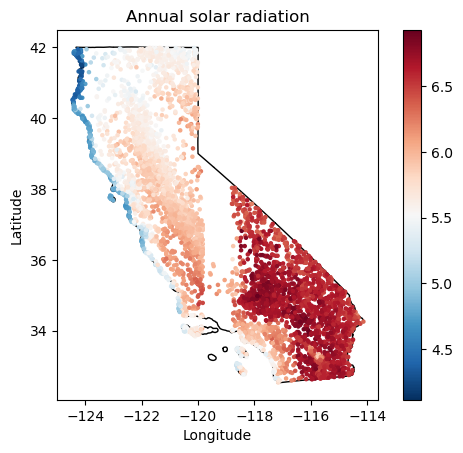

In [46]:
# Load the California shapefile
ca_shapfile_path = data_path+ 'ca_state_boundary/CA_State_TIGER2016.shp'
ca_shape         = gpd.read_file(ca_shapfile_path)
ca_shape         = ca_shape.to_crs("EPSG:4326")
print(ca_shape.crs)


# Plot the county boundaries
fig, ax = plt.subplots()
ca_shape.plot(ax=ax, color='white', edgecolor='black')

# Plot solar_rad data on top of the county boundaries
geo_df_rad.plot(ax=ax, column='solrad_annual', legend=True, markersize=5, cmap='RdBu_r',  missing_kwds={
        "color": "white",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    })


# geo_df_rad.plot(ax=ax, column='solrad_annual', legend=True, markersize=50, cmap='OrRd', alpha=0.5)

# Add titles and labels as needed
plt.title("Annual solar radiation")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()

EPSG:4326


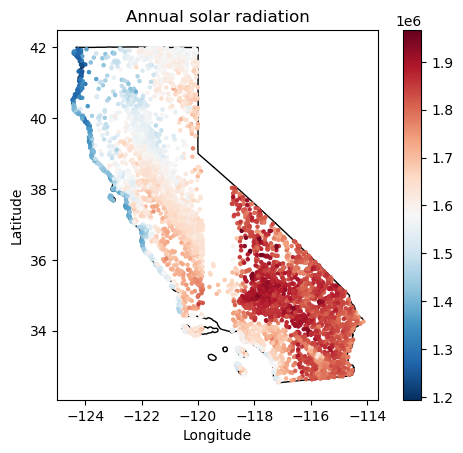

In [47]:
# Load the California shapefile
ca_shapfile_path = data_path+ 'ca_state_boundary/CA_State_TIGER2016.shp'
ca_shape         = gpd.read_file(ca_shapfile_path)
ca_shape         = ca_shape.to_crs("EPSG:4326")
print(ca_shape.crs)


# Plot the county boundaries
fig, ax = plt.subplots()
ca_shape.plot(ax=ax, color='white', edgecolor='black')

# Plot solar_rad data on top of the county boundaries
geo_df_rad.plot(ax=ax, column='ac_annual', legend=True, markersize=5, cmap='RdBu_r',  missing_kwds={
        "color": "white",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    })


# geo_df_rad.plot(ax=ax, column='solrad_annual', legend=True, markersize=50, cmap='OrRd', alpha=0.5)

# Add titles and labels as needed
plt.title("Annual solar radiation")
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()

## Add data to big dataframe

#### Find threshold for ac_annual. Exclude the bottom 5% 

In [48]:
ac_annual_threshold = geo_df_rad['ac_annual'].quantile(q=0.10)
ac_annual_threshold 

1533012.6658138798

In [49]:
# Ensure both GeoDataFrames have the same CRS
# Convert ca_features to a GeoDataFrame
gdf_ca_features = gpd.GeoDataFrame(
    ca_grid_sampled, 
    geometry=gpd.points_from_xy(ca_grid_sampled.Longitude, ca_grid_sampled.Latitude),
    crs="EPSG:4326"
)

# Ensure ca_rad is a GeoDataFrame with the same CRS
gdf_ca_rad = gpd.GeoDataFrame(
    ca_rad,
    geometry=gpd.points_from_xy(ca_rad.longitude, ca_rad.latitude),
    crs="EPSG:4326"
)

# Reproject to a suitable projected CRS for accurate distance calculations
gdf_ca_features = gdf_ca_features.to_crs("EPSG:3310")
gdf_ca_rad      = gdf_ca_rad.to_crs("EPSG:3310")


In [50]:
# Perform the spatial join to find the nearest neighbors and get their 'elevation'
ca_features_with_solar_data = gpd.sjoin_nearest(gdf_ca_features, gdf_ca_rad[['geometry', 'solrad_annual','ac_monthly', 'poa_monthly', 'solrad_monthly','dc_monthly','ac_annual']],\
                                                how='left', distance_col='distance')
ca_features_with_solar_data

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,feature_violated,geometry,index_right,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,distance
68042,34.082452,-117.396048,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (240284.093 -433720.832),0,6.137753,"[126643.6284333316, 123642.4656084192, 146079....","[160.3371500625433, 157.9419747969732, 190.017...","[5.172166131049785, 5.640784814177614, 6.12959...","[132621.8932622115, 129576.8218587892, 153178....",1.696741e+06,0.0
70697,33.710924,-117.137177,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (265408.980 -474219.376),1,6.204925,"[126868.3514493219, 123183.8261829259, 150337....","[163.6214888471466, 159.1281172506521, 198.769...","[5.278112543456341, 5.683147044666148, 6.41193...","[132793.0245010775, 128887.8434912795, 157389....",1.690435e+06,0.0
15740,39.948686,-122.357736,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-201362.002 217261.810),2,5.701319,"[81871.68545656932, 90825.3059124629, 139086.2...","[100.9587614211884, 113.1211746079644, 177.813...","[3.256734239393176, 4.040041950284444, 5.73593...","[86019.00030301968, 95337.82386751169, 145682....",1.566192e+06,0.0
24863,37.934613,-121.645842,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-144455.965 -7834.409),3,5.892671,"[93225.92555313384, 117872.5185756382, 133564....","[113.2858897184085, 147.74228808641, 170.25043...","[3.654383539303501, 5.276510288800359, 5.49194...","[97835.782674236, 123415.2943375236, 139980.07...",1.657431e+06,0.0
20092,37.973721,-121.991002,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,POINT (-174655.408 -2906.729),4,5.897817,"[96173.72130512354, 120312.542412835, 141419.0...","[116.6067532589445, 150.3203686240996, 179.493...","[3.761508169643369, 5.368584593717842, 5.79011...","[100873.0371669258, 125951.7057612103, 148151....",1.666310e+06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51496,33.906465,-120.027900,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,land_cover,POINT (-2580.305 -456540.563),4995,5.657576,"[124430.625264793, 128050.6419688767, 145367.7...","[153.6989610932505, 160.3153573714344, 182.836...","[4.958031003008081, 5.725548477551228, 5.89796...","[130265.685683405, 134053.1184491426, 152307.0...",1.630118e+06,0.0
81365,33.417612,-115.993832,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,land_cover,POINT (372726.749 -502868.790),4996,6.323911,"[134881.0702731289, 134061.3259228609, 160552....","[171.7044746679793, 171.4122722654111, 210.579...","[5.538854021547718, 6.121866866621824, 6.79290...","[141101.3654307219, 140161.8184159705, 167980....",1.721495e+06,0.0
14574,41.689003,-122.465599,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,land_cover,POINT (-205548.754 410618.099),4997,5.611707,"[93573.38738081408, 97924.47093016192, 131421....","[114.6791140404956, 121.3874734554713, 166.397...","[3.699326259370827, 4.335266909123976, 5.36766...","[98146.2203916726, 102768.3713357534, 137701.7...",1.557846e+06,0.0
46056,36.683149,-120.329916,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,land_cover,POINT (-29442.310 -148148.843),4998,5.919039,"[87091.30519709826, 105473.3029344761, 150766....","[107.8239676379539, 132.2051590546551, 193.002...","[3.478192504450126, 4.72161282338054, 6.225877...","[91538.11642345533, 110607.0393392461, 158047....",1.633566e+06,0.0


In [51]:


# If you don't need the distance information, drop the 'distance' column
ca_features_with_solar_data.drop(columns=['index_right', 'distance',], inplace=True)

# Optionally, project back to geographic CRS if needed for other purposes
ca_features_with_solar_data = ca_features_with_solar_data.to_crs("EPSG:4326")

ca_features_with_solar_data

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,slope,elevation,feature_violated,geometry,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual
68042,34.082452,-117.396048,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,354.0,NaN,POINT (-117.39605 34.08245),6.137753,"[126643.6284333316, 123642.4656084192, 146079....","[160.3371500625433, 157.9419747969732, 190.017...","[5.172166131049785, 5.640784814177614, 6.12959...","[132621.8932622115, 129576.8218587892, 153178....",1.696741e+06
70697,33.710924,-117.137177,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,446.0,NaN,POINT (-117.13718 33.71092),6.204925,"[126868.3514493219, 123183.8261829259, 150337....","[163.6214888471466, 159.1281172506521, 198.769...","[5.278112543456341, 5.683147044666148, 6.41193...","[132793.0245010775, 128887.8434912795, 157389....",1.690435e+06
15740,39.948686,-122.357736,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,139.0,NaN,POINT (-122.35774 39.94869),5.701319,"[81871.68545656932, 90825.3059124629, 139086.2...","[100.9587614211884, 113.1211746079644, 177.813...","[3.256734239393176, 4.040041950284444, 5.73593...","[86019.00030301968, 95337.82386751169, 145682....",1.566192e+06
24863,37.934613,-121.645842,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,10.0,NaN,POINT (-121.64584 37.93461),5.892671,"[93225.92555313384, 117872.5185756382, 133564....","[113.2858897184085, 147.74228808641, 170.25043...","[3.654383539303501, 5.276510288800359, 5.49194...","[97835.782674236, 123415.2943375236, 139980.07...",1.657431e+06
20092,37.973721,-121.991002,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,54.0,NaN,POINT (-121.99100 37.97372),5.897817,"[96173.72130512354, 120312.542412835, 141419.0...","[116.6067532589445, 150.3203686240996, 179.493...","[3.761508169643369, 5.368584593717842, 5.79011...","[100873.0371669258, 125951.7057612103, 148151....",1.666310e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51496,33.906465,-120.027900,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,POINT (-120.02790 33.90647),5.657576,"[124430.625264793, 128050.6419688767, 145367.7...","[153.6989610932505, 160.3153573714344, 182.836...","[4.958031003008081, 5.725548477551228, 5.89796...","[130265.685683405, 134053.1184491426, 152307.0...",1.630118e+06
81365,33.417612,-115.993832,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-70.0,land_cover,POINT (-115.99383 33.41761),6.323911,"[134881.0702731289, 134061.3259228609, 160552....","[171.7044746679793, 171.4122722654111, 210.579...","[5.538854021547718, 6.121866866621824, 6.79290...","[141101.3654307219, 140161.8184159705, 167980....",1.721495e+06
14574,41.689003,-122.465599,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,798.0,land_cover,POINT (-122.46560 41.68900),5.611707,"[93573.38738081408, 97924.47093016192, 131421....","[114.6791140404956, 121.3874734554713, 166.397...","[3.699326259370827, 4.335266909123976, 5.36766...","[98146.2203916726, 102768.3713357534, 137701.7...",1.557846e+06
46056,36.683149,-120.329916,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,49.0,land_cover,POINT (-120.32992 36.68315),5.919039,"[87091.30519709826, 105473.3029344761, 150766....","[107.8239676379539, 132.2051590546551, 193.002...","[3.478192504450126, 4.72161282338054, 6.225877...","[91538.11642345533, 110607.0393392461, 158047....",1.633566e+06


In [52]:
##Set value where ac_annual is below threshold
ac_annual_low   = (ca_features_with_solar_data['ac_annual']<=ac_annual_threshold) & (ca_features_with_solar_data['Solar_farm_present']!=1) \
& (ca_features_with_solar_data['elevation'] < elevation_threshold) \
& (ca_features_with_solar_data['slope']<slope_threshold) & (ca_features_with_solar_data['land_cover']!=0)

ca_features_with_solar_data.loc[ac_annual_low,'Solar_farm_present']=0
ca_features_with_solar_data.loc[ac_annual_low,'feature_violated']='ac_annual'
ca_features_with_solar_data

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,slope,elevation,feature_violated,geometry,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual
68042,34.082452,-117.396048,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,354.0,NaN,POINT (-117.39605 34.08245),6.137753,"[126643.6284333316, 123642.4656084192, 146079....","[160.3371500625433, 157.9419747969732, 190.017...","[5.172166131049785, 5.640784814177614, 6.12959...","[132621.8932622115, 129576.8218587892, 153178....",1.696741e+06
70697,33.710924,-117.137177,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,446.0,NaN,POINT (-117.13718 33.71092),6.204925,"[126868.3514493219, 123183.8261829259, 150337....","[163.6214888471466, 159.1281172506521, 198.769...","[5.278112543456341, 5.683147044666148, 6.41193...","[132793.0245010775, 128887.8434912795, 157389....",1.690435e+06
15740,39.948686,-122.357736,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,139.0,NaN,POINT (-122.35774 39.94869),5.701319,"[81871.68545656932, 90825.3059124629, 139086.2...","[100.9587614211884, 113.1211746079644, 177.813...","[3.256734239393176, 4.040041950284444, 5.73593...","[86019.00030301968, 95337.82386751169, 145682....",1.566192e+06
24863,37.934613,-121.645842,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,10.0,NaN,POINT (-121.64584 37.93461),5.892671,"[93225.92555313384, 117872.5185756382, 133564....","[113.2858897184085, 147.74228808641, 170.25043...","[3.654383539303501, 5.276510288800359, 5.49194...","[97835.782674236, 123415.2943375236, 139980.07...",1.657431e+06
20092,37.973721,-121.991002,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,54.0,NaN,POINT (-121.99100 37.97372),5.897817,"[96173.72130512354, 120312.542412835, 141419.0...","[116.6067532589445, 150.3203686240996, 179.493...","[3.761508169643369, 5.368584593717842, 5.79011...","[100873.0371669258, 125951.7057612103, 148151....",1.666310e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51496,33.906465,-120.027900,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,POINT (-120.02790 33.90647),5.657576,"[124430.625264793, 128050.6419688767, 145367.7...","[153.6989610932505, 160.3153573714344, 182.836...","[4.958031003008081, 5.725548477551228, 5.89796...","[130265.685683405, 134053.1184491426, 152307.0...",1.630118e+06
81365,33.417612,-115.993832,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-70.0,land_cover,POINT (-115.99383 33.41761),6.323911,"[134881.0702731289, 134061.3259228609, 160552....","[171.7044746679793, 171.4122722654111, 210.579...","[5.538854021547718, 6.121866866621824, 6.79290...","[141101.3654307219, 140161.8184159705, 167980....",1.721495e+06
14574,41.689003,-122.465599,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,798.0,land_cover,POINT (-122.46560 41.68900),5.611707,"[93573.38738081408, 97924.47093016192, 131421....","[114.6791140404956, 121.3874734554713, 166.397...","[3.699326259370827, 4.335266909123976, 5.36766...","[98146.2203916726, 102768.3713357534, 137701.7...",1.557846e+06
46056,36.683149,-120.329916,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,49.0,land_cover,POINT (-120.32992 36.68315),5.919039,"[87091.30519709826, 105473.3029344761, 150766....","[107.8239676379539, 132.2051590546551, 193.002...","[3.478192504450126, 4.72161282338054, 6.225877...","[91538.11642345533, 110607.0393392461, 158047....",1.633566e+06


In [53]:
ca_features_with_solar_data.loc[ca_features_with_solar_data['Solar_farm_present'].isna()]

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,slope,elevation,feature_violated,geometry,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual
68042,34.082452,-117.396048,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,354.0,NaN,POINT (-117.39605 34.08245),6.137753,"[126643.6284333316, 123642.4656084192, 146079....","[160.3371500625433, 157.9419747969732, 190.017...","[5.172166131049785, 5.640784814177614, 6.12959...","[132621.8932622115, 129576.8218587892, 153178....",1.696741e+06
70697,33.710924,-117.137177,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,446.0,NaN,POINT (-117.13718 33.71092),6.204925,"[126868.3514493219, 123183.8261829259, 150337....","[163.6214888471466, 159.1281172506521, 198.769...","[5.278112543456341, 5.683147044666148, 6.41193...","[132793.0245010775, 128887.8434912795, 157389....",1.690435e+06
15740,39.948686,-122.357736,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,139.0,NaN,POINT (-122.35774 39.94869),5.701319,"[81871.68545656932, 90825.3059124629, 139086.2...","[100.9587614211884, 113.1211746079644, 177.813...","[3.256734239393176, 4.040041950284444, 5.73593...","[86019.00030301968, 95337.82386751169, 145682....",1.566192e+06
24863,37.934613,-121.645842,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,10.0,NaN,POINT (-121.64584 37.93461),5.892671,"[93225.92555313384, 117872.5185756382, 133564....","[113.2858897184085, 147.74228808641, 170.25043...","[3.654383539303501, 5.276510288800359, 5.49194...","[97835.782674236, 123415.2943375236, 139980.07...",1.657431e+06
20092,37.973721,-121.991002,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,54.0,NaN,POINT (-121.99100 37.97372),5.897817,"[96173.72130512354, 120312.542412835, 141419.0...","[116.6067532589445, 150.3203686240996, 179.493...","[3.761508169643369, 5.368584593717842, 5.79011...","[100873.0371669258, 125951.7057612103, 148151....",1.666310e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90741,33.554491,-114.591615,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,78.0,NaN,POINT (-114.59162 33.55449),6.526529,"[134247.7042257621, 139468.4351134145, 163372....","[171.1585900659082, 176.5647596673323, 214.276...","[5.521244840835748, 6.305884273833298, 6.91215...","[140484.5339779359, 145894.3806423296, 170927....",1.784687e+06
15994,39.948686,-122.336163,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,133.0,NaN,POINT (-122.33616 39.94869),5.701319,"[81871.68545656932, 90825.3059124629, 139086.2...","[100.9587614211884, 113.1211746079644, 177.813...","[3.256734239393176, 4.040041950284444, 5.73593...","[86019.00030301968, 95337.82386751169, 145682....",1.566192e+06
46045,36.468054,-120.329916,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,108.0,NaN,POINT (-120.32992 36.46805),6.151262,"[102825.6878714607, 120086.1244386997, 154834....","[127.4495480542118, 150.4203930958948, 198.794...","[4.111275743684253, 5.372156896281956, 6.41273...","[107864.0970827976, 125715.8436338356, 162297....",1.701748e+06
87467,34.649521,-115.174074,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,851.0,NaN,POINT (-115.17407 34.64952),6.580603,"[132968.5090835282, 142870.9861948713, 173335....","[163.1350464131402, 177.6974508228636, 222.598...","[5.262420852036781, 6.346337529387986, 7.18061...","[139698.5374361116, 149898.5658891246, 181639....",1.836813e+06


### Finally, save this data as a CSV file

In [54]:
ca_features_with_solar_data.drop(columns='geometry').to_csv(data_path2+'ca_data_version_14.csv', index=False)

In [55]:
ca_features_with_solar_data_check = pd.read_csv(data_path2+'ca_data_version_14.csv')
ca_features_with_solar_data_check 

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,land_cover,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual
0,34.082452,-117.396048,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,354.0,NaN,6.137753,"[126643.6284333316, 123642.4656084192, 146079....","[160.3371500625433, 157.9419747969732, 190.017...","[5.172166131049785, 5.640784814177614, 6.12959...","[132621.8932622115, 129576.8218587892, 153178....",1.696741e+06
1,33.710924,-117.137177,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,446.0,NaN,6.204925,"[126868.3514493219, 123183.8261829259, 150337....","[163.6214888471466, 159.1281172506521, 198.769...","[5.278112543456341, 5.683147044666148, 6.41193...","[132793.0245010775, 128887.8434912795, 157389....",1.690435e+06
2,39.948686,-122.357736,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,139.0,NaN,5.701319,"[81871.68545656932, 90825.3059124629, 139086.2...","[100.9587614211884, 113.1211746079644, 177.813...","[3.256734239393176, 4.040041950284444, 5.73593...","[86019.00030301968, 95337.82386751169, 145682....",1.566192e+06
3,37.934613,-121.645842,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,10.0,NaN,5.892671,"[93225.92555313384, 117872.5185756382, 133564....","[113.2858897184085, 147.74228808641, 170.25043...","[3.654383539303501, 5.276510288800359, 5.49194...","[97835.782674236, 123415.2943375236, 139980.07...",1.657431e+06
4,37.973721,-121.991002,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,54.0,NaN,5.897817,"[96173.72130512354, 120312.542412835, 141419.0...","[116.6067532589445, 150.3203686240996, 179.493...","[3.761508169643369, 5.368584593717842, 5.79011...","[100873.0371669258, 125951.7057612103, 148151....",1.666310e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,33.906465,-120.027900,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,land_cover,5.657576,"[124430.625264793, 128050.6419688767, 145367.7...","[153.6989610932505, 160.3153573714344, 182.836...","[4.958031003008081, 5.725548477551228, 5.89796...","[130265.685683405, 134053.1184491426, 152307.0...",1.630118e+06
4996,33.417612,-115.993832,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,-70.0,land_cover,6.323911,"[134881.0702731289, 134061.3259228609, 160552....","[171.7044746679793, 171.4122722654111, 210.579...","[5.538854021547718, 6.121866866621824, 6.79290...","[141101.3654307219, 140161.8184159705, 167980....",1.721495e+06
4997,41.689003,-122.465599,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,798.0,land_cover,5.611707,"[93573.38738081408, 97924.47093016192, 131421....","[114.6791140404956, 121.3874734554713, 166.397...","[3.699326259370827, 4.335266909123976, 5.36766...","[98146.2203916726, 102768.3713357534, 137701.7...",1.557846e+06
4998,36.683149,-120.329916,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,49.0,land_cover,5.919039,"[87091.30519709826, 105473.3029344761, 150766....","[107.8239676379539, 132.2051590546551, 193.002...","[3.478192504450126, 4.72161282338054, 6.225877...","[91538.11642345533, 110607.0393392461, 158047....",1.633566e+06


In [56]:
ca_features_with_solar_data_check.loc[(ca_features_with_solar_data_check['feature_violated']=='ac_annual')]

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,land_cover,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual
73,41.728111,-122.595034,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,777.0,ac_annual,5.524684,"[92583.69232244197, 96613.66069294601, 129187....","[113.2823672982625, 119.7423440072052, 164.550...","[3.654269912847177, 4.276512285971615, 5.30807...","[97122.90124384948, 101400.6585907242, 135414....",1.531433e+06
82,39.342509,-121.386971,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,182.0,ac_annual,5.531502,"[77182.60414189834, 88118.55690959594, 125786....","[97.01244096685345, 112.9171458800722, 163.122...","[3.129433579575918, 4.032755210002577, 5.26200...","[81171.14975040083, 92549.688221743, 131902.19...",1.507421e+06
91,38.443020,-122.681324,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,62.0,ac_annual,5.474415,"[91440.04216997989, 106619.9815839709, 123803....","[111.5476264400228, 133.9554790852982, 158.391...","[3.598310530323316, 4.784124253046365, 5.10941...","[95949.42172682591, 111785.6845698762, 129822....",1.529421e+06
132,39.401171,-123.328501,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,419.0,ac_annual,5.585635,"[85208.20035632144, 101088.1650713366, 121955....","[108.5985683699556, 132.3551908215319, 161.687...","[3.503179624837278, 4.726971100768997, 5.21571...","[89475.40418993113, 106015.8969824135, 127880....",1.489132e+06
164,38.443020,-122.746042,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,38.0,ac_annual,5.484733,"[90997.89874559095, 106348.8459176616, 123121....","[111.1037104023932, 133.9756396628886, 157.470...","[3.583990658141715, 4.784844273674593, 5.07969...","[95490.91190694315, 111481.1036750963, 129108....",1.532572e+06
179,37.465314,-122.444026,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,13.0,ac_annual,4.757011,"[94483.09888706701, 93522.89481703547, 136929....","[114.922840336731, 114.7093634108351, 171.3068...","[3.707188397959063, 4.096762978958398, 5.52602...","[99124.72382752932, 98172.73376355604, 143459....",1.383972e+06
309,40.378877,-122.379308,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,147.0,ac_annual,5.593829,"[81063.51668341336, 102262.0023664664, 111078....","[101.2839432055081, 131.4254101279292, 143.970...","[3.267223974371228, 4.693764647426041, 4.64420...","[85174.26558682043, 107218.4711745161, 116625....",1.507102e+06
350,40.359323,-122.034148,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,236.0,ac_annual,5.489821,"[78155.85621090098, 83063.93410143255, 136321....","[97.21580262223213, 104.7896381916845, 175.201...","[3.13599363297523, 3.742487078274447, 5.651648...","[82167.50284912242, 87287.19343934613, 142792....",1.497023e+06
563,40.574418,-122.271446,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,185.0,ac_annual,5.432262,"[75036.94365232516, 81188.58050881731, 105298....","[93.96790865838994, 102.9707399406505, 136.898...","[3.031222859948063, 3.677526426451802, 4.41607...","[78927.55075947414, 85346.64829828394, 110636....",1.466084e+06
716,40.769959,-124.191403,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,6.0,ac_annual,4.513369,"[75207.20934160973, 84235.18356517561, 104930....","[90.96211090990896, 102.8007197721425, 129.223...","[2.934261642255128, 3.671454277576517, 4.16850...","[79096.9964271071, 88542.5889809604, 110426.47...",1.314769e+06


In [57]:
ca_features_with_solar_data_check['feature_violated']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4995    land_cover
4996    land_cover
4997    land_cover
4998    land_cover
4999    land_cover
Name: feature_violated, Length: 5000, dtype: object